In [1]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [3]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('Defects_processed_v1.csv', dtype = str, index_col = 0)
print(report.columns)
print(report.shape)

Index(['enquiry_number', 'enquiry_time', 'service_code', 'subject_code',
       'priority_code', 'enq_status_code', 'log_effective_date',
       'enquiry_desc', 'officer_code', 'claim_date', 'claim_tot', 'claim_code',
       'area_name', 'site_address', 'quad', 'feature_location', 'asset_id'],
      dtype='object')
(256997, 17)


In [4]:
report.head(5)

,enquiry_number,enquiry_time,service_code,subject_code,priority_code,enq_status_code,log_effective_date,enquiry_desc,officer_code,claim_date,claim_tot,claim_code,area_name,site_address,quad,feature_location,asset_id
0,1558145,05/05/2010 09:16,CW,PH1,H24,430,07/05/2010 11:45,just along from the county border approx 20 ya...,LW2,17/05/2010 09:30,41.67,F1/946775,Tring Town,A41 Tring Bypass,SW,County boundary to B4635 overbridge,A41/011
1,1533019,09/02/2010 15:23,WM,RICE,H2,400,20/12/2009 12:55,OOH 20096 - CARERS NEED ACCESS TO ELDERLY AND ...,ECR2,17/02/2010 09:13,192.29,F1/922316,Kings Langley,Abbots Rise,SW,Hempstead Road to house 59,2U415/10
2,1532872,09/02/2010 11:54,WM,RICE,H2,400,20/12/2009 10:10,OOH 20076 - CARERS NEED ACCESS TO ELDERLY AND ...,ECR2,17/02/2010 08:59,195.24,F1/922185,Kings Langley,Abbots Rise,SW,Hempstead Road to house 59,2U415/10
3,1350964,05/02/2008 16:41,CW,CPTH,NaN,400,06/02/2008 12:00,The road was repaired at the jucntion of the A...,CSC3,NaN,NaN,NaN,Kings Langley,Abbots Rise,EH,Hempstead Road to house 59,2U415/10
4,1377901,10/07/2008 12:00,CW,CPTH,NaN,410,10/07/2008 14:40,Road surface is breaking up on section of road...,WEB,NaN,NaN,NaN,Kings Langley,Abbots Rise,WEB,Hempstead Road to house 59,2U415/10


In [5]:
#The Log Effective Date column will be our main date. We extract the year, and set it as a new column

#This search is just to filter anomalous years
report[report['log_effective_date'].str.contains('8517')]
report['log_effective_date'] = report['log_effective_date'].replace("09/02/8517 08:00","09/02/2010 08:00")
report[report['log_effective_date'].str.contains('2500')]
report['log_effective_date'] = report['log_effective_date'].replace("19/12/2500 20:00","19/12/2009 20:00")

report['Year'] = pd.DatetimeIndex(report['log_effective_date']).year

In [6]:
report.head(5)

,enquiry_number,enquiry_time,service_code,subject_code,priority_code,enq_status_code,log_effective_date,enquiry_desc,officer_code,claim_date,claim_tot,claim_code,area_name,site_address,quad,feature_location,asset_id,Year
0,1558145,05/05/2010 09:16,CW,PH1,H24,430,07/05/2010 11:45,just along from the county border approx 20 ya...,LW2,17/05/2010 09:30,41.67,F1/946775,Tring Town,A41 Tring Bypass,SW,County boundary to B4635 overbridge,A41/011,2010
1,1533019,09/02/2010 15:23,WM,RICE,H2,400,20/12/2009 12:55,OOH 20096 - CARERS NEED ACCESS TO ELDERLY AND ...,ECR2,17/02/2010 09:13,192.29,F1/922316,Kings Langley,Abbots Rise,SW,Hempstead Road to house 59,2U415/10,2009
2,1532872,09/02/2010 11:54,WM,RICE,H2,400,20/12/2009 10:10,OOH 20076 - CARERS NEED ACCESS TO ELDERLY AND ...,ECR2,17/02/2010 08:59,195.24,F1/922185,Kings Langley,Abbots Rise,SW,Hempstead Road to house 59,2U415/10,2009
3,1350964,05/02/2008 16:41,CW,CPTH,NaN,400,06/02/2008 12:00,The road was repaired at the jucntion of the A...,CSC3,NaN,NaN,NaN,Kings Langley,Abbots Rise,EH,Hempstead Road to house 59,2U415/10,2008
4,1377901,10/07/2008 12:00,CW,CPTH,NaN,410,10/07/2008 14:40,Road surface is breaking up on section of road...,WEB,NaN,NaN,NaN,Kings Langley,Abbots Rise,WEB,Hempstead Road to house 59,2U415/10,2008


### Distribution of instances per year

In [7]:
report['Year'].value_counts()

2010    33964
2013    27481
2009    27196
2008    23116
2007    21987
2011    20446
2014    19214
2018    18991
2016    16120
2012    15240
2017    13754
2015    13532
2019     5927
1900       26
2001        1
2041        1
2101        1
Name: Year, dtype: int64

In [8]:
#Drop the years that have an unsual register and sort values per year
report = report.drop(report[(report['Year']>2019)|(report['Year']<2006)].index)
year_df = report.sort_values(['Year']).reset_index(drop=True)

Text(0, 0.5, 'Count of Defect Works')

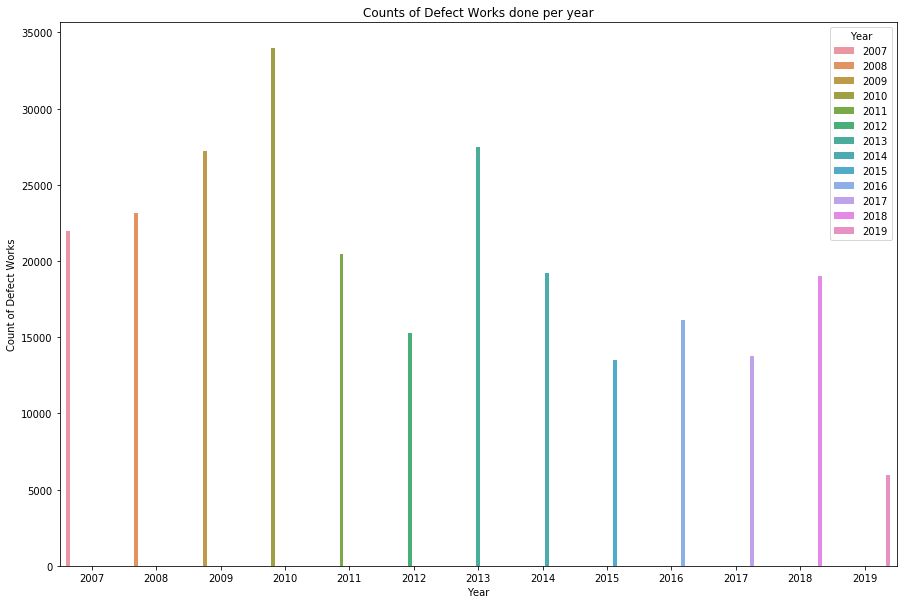

In [9]:
#Plot the number of works per year

plt.figure(figsize=(15, 10))
ax = sns.countplot(x='Year', data=year_df, hue='Year')
ax.set_title('Counts of Defect Works done per year')

ax.set_xlabel('Year')
ax.set_ylabel('Count of Defect Works')

### Distribution of instances per Service Code and Subject Code

In [10]:
report['service_code'].value_counts()

CW     136655
CW1     76361
FL      15885
WM       9219
FL1      8860
NR       5045
HD       4943
Name: service_code, dtype: int64

In [11]:
report['subject_code'].value_counts()

PH7     46093
PH1     43557
CPH3    32343
CPTH    24658
CPH4    24309
CPH2    13613
RICE     9219
GUL      9177
SPL      9025
PH14     8031
NRSW     7433
CFL      5934
NZU      4943
DCF3     3462
DCF2     3009
CCD1     2074
DCF1     1283
CMUD     1227
CCD3     1211
CBAR      895
SPLE      781
CFS1      645
DPD1      609
CMD3      583
CCD4      499
DPD2      497
CKD3      461
PDAM      410
CSH1      373
SFL       364
CKD2      250
Name: subject_code, dtype: int64

In [12]:
ans = report.groupby(['subject_code'],as_index = False).size().sort_values(ascending = False).head(10).sum()
print('The instances covered by the top 10 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 10 codes are: 220025
Which represents: 86.0% of the total amount


No handles with labels found to put in legend.


Text(0, 0.5, 'Count')

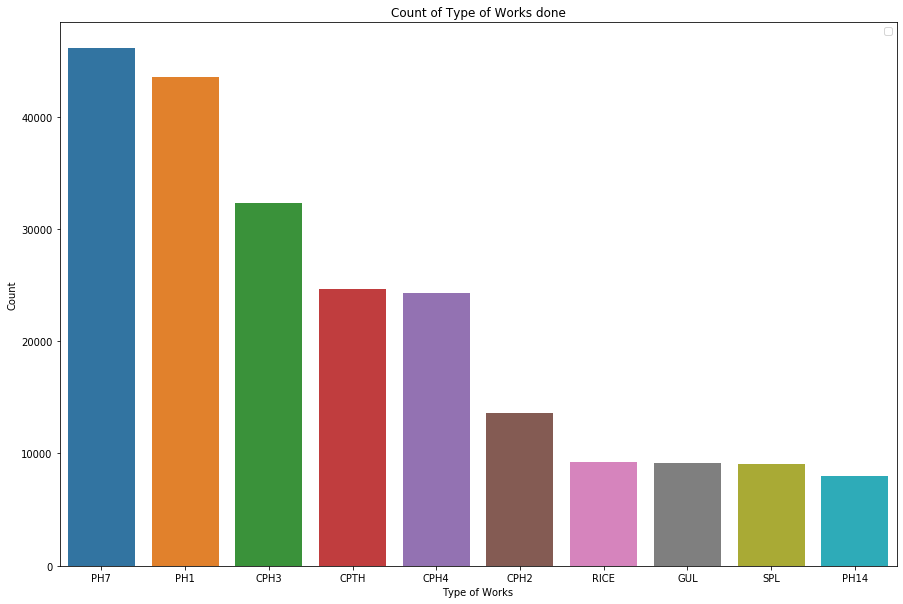

In [13]:
#Plot the number of works per year

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="subject_code", data=report,  order = report['subject_code'].value_counts().head(10).index)
ax.set_title('Count of Type of Works done')

plt.legend(loc='upper right')

ax.set_xlabel('Type of Works')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count per District')

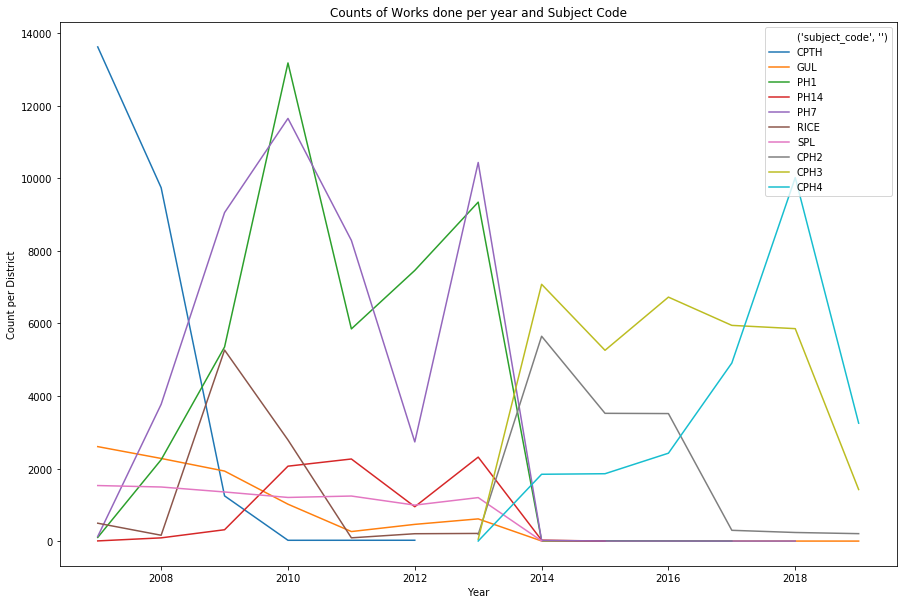

In [14]:
##Plot the evolution of works per district divided by year (Line plot) *Removing the null years
#Keep only the top 10 instances
filter_subc = ['PH7','PH1','CPTH','CPH3','CPH4','CPH2','SPL','PH14','GUL','RICE']

persubject = year_df[year_df.subject_code.isin(filter_subc)]
persubject = persubject.reset_index(drop=True)
persubject = persubject[['Year','subject_code']]
#persubject['Year'] = persubject['Year'].astype(str)

persubject2 = persubject.groupby(['Year','subject_code']).agg({'subject_code': ['count']})
persubject2.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=('Year',      ''), y= (  'subject_code', 'count'), data=persubject2, hue=(  'subject_code',      ''))
ax.set_title('Counts of Works done per year and Subject Code')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Count per District')

In [44]:
#Testing the proportions of one specific year
#y2018 = report.loc[report['Year']==2018]
#print(y2018.shape)
#y2018['subject_code'].value_counts()

(18991, 18)

### Distribution of Instances per Priority Code

In [15]:
report['priority_code'].value_counts()

H24    66502
D7     46093
H2     41235
D5     38310
D20    24808
D14     8031
Name: priority_code, dtype: int64

In [16]:
##Show the table of Priority Codes vs Subject Codes to understand how are these events prioritized
#Keep only the top 10 instances
filter_subc = ['PH7','PH1','CPTH','CPH3','CPH4','CPH2','SPL','PH14','GUL','RICE']

perpriority = year_df[year_df.subject_code.isin(filter_subc)]
perpriority = perpriority.reset_index(drop=True)
perpriority = perpriority[['priority_code','subject_code']]

perpriority2 = perpriority.groupby(['priority_code','subject_code']).agg({'subject_code': ['count']})
perpriority2.reset_index(inplace = True)

perpriority2

priority_code subject_code       
                              count
0           D14         PH14   8031
1           D20         CPH4  24309
2            D5         CPH3  32343
3            D7          PH7  46093
4            H2          GUL   9177
5            H2         RICE   9219
6            H2          SPL   9025
7           H24         CPH2  13613
8           H24          PH1  43557

Text(0, 0.5, 'Count per Priority Code')

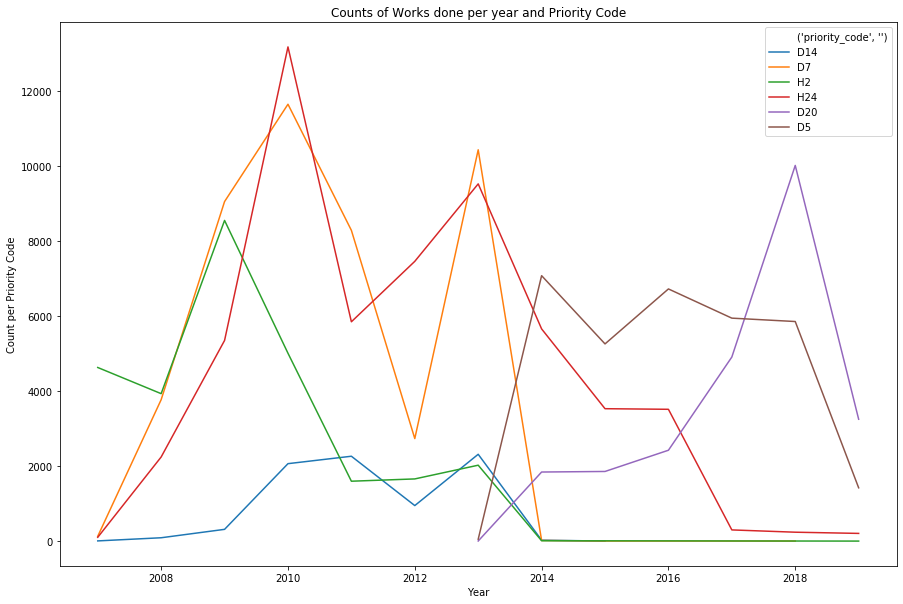

In [17]:
##Plot the evolution of works per priority code divided by year (Line plot) 
#Keep only the top 10 instances
filter_subc = ['PH7','PH1','CPTH','CPH3','CPH4','CPH2','SPL','PH14','GUL','RICE']

perpriority3 = year_df[year_df.subject_code.isin(filter_subc)]
perpriority3 = perpriority3.reset_index(drop=True)
perpriority3 = perpriority3[['Year','priority_code']]
#perpriority3['Year'] = perpriority3['Year'].astype(str)

perpriority4 = perpriority3.groupby(['Year','priority_code']).agg({'priority_code': ['count']})
perpriority4.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=('Year',      ''), y= (  'priority_code', 'count'), data=perpriority4, hue=(  'priority_code',      ''))
ax.set_title('Counts of Works done per year and Priority Code')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Count per Priority Code')

In [46]:
#Testing the proportions of one specific year
#H = y2018.loc[y2018['priority_code']==2018]
#print(y2018.shape)
y2018['priority_code'].value_counts()

D20    10114
D5      6952
H24     1187
H2       736
D7         2
Name: priority_code, dtype: int64

In [48]:
#Testing the proportions of one specific year
y2014 = report.loc[report['Year']==2014]
print(y2014.shape)
y2014['priority_code'].value_counts()

(19214, 18)


D5     8556
H24    7273
D20    1937
H2     1394
D14      26
D7       18
Name: priority_code, dtype: int64

In [49]:
(7273+1394)/(7273+1394 + 8556 + 1937 + 45)

0.451288726894038

In [47]:
(1187+736)/19000

0.10121052631578947

### Distribution of Instances per Enquiry Status

In [18]:
report['enq_status_code'].value_counts().head(15)

400    134405
410     31787
420     28872
480     27454
445     11441
430      7878
890      6826
490      4179
435       968
450       768
481       726
460       659
421       278
485       227
431       141
Name: enq_status_code, dtype: int64

In [19]:
ans = report.groupby(['enq_status_code'],as_index = False).size().sort_values(ascending = False).head(5).sum()
print('The instances covered by the top 5 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 5 codes are: 233959
Which represents: 91.0% of the total amount


Text(0, 0.5, 'Count per Priority Code')

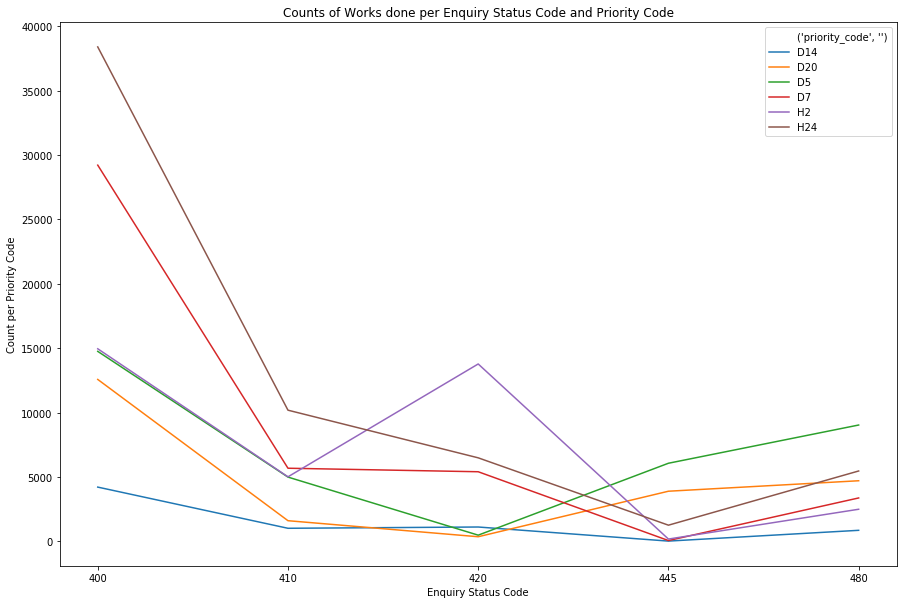

In [20]:
##Plot the priority codes vs enquiry status (Line plot) 
#Keep only the top 5 instances of enquiry status
filter_prioc = ['400','410','420','480','445']

perenq = year_df[year_df.enq_status_code.isin(filter_prioc)]
perenq = perenq.reset_index(drop=True)
perenq = perenq[['enq_status_code','priority_code']]
perenq['enq_status_code'] = perenq['enq_status_code'].astype('category')

perenq2 = perenq.groupby(['enq_status_code','priority_code']).agg({'priority_code': ['count']})
perenq2.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=(  'enq_status_code',      ''), y= ('priority_code', 'count'), 
                  data=perenq2, hue=('priority_code', ''), legend="full")
ax.set_title('Counts of Works done per Enquiry Status Code and Priority Code')

plt.legend(loc='upper right')
ax.set_xlabel('Enquiry Status Code')
ax.set_ylabel('Count per Priority Code')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C699308>,
      dtype=object)

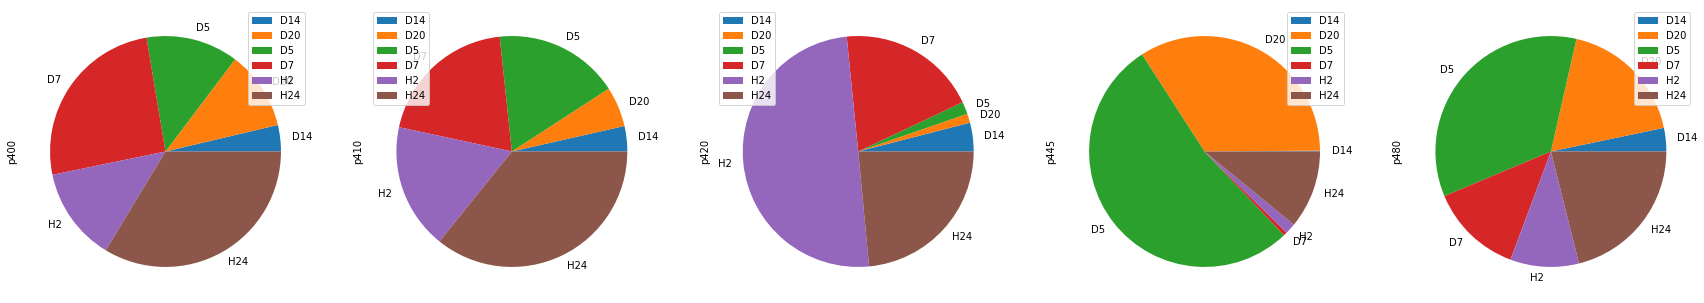

In [21]:
#Show the relationship between priority codes and Enquiry Status
filter_prioc = ['400','410','420','480','445']

perenq = year_df[year_df.enq_status_code.isin(filter_prioc)]
perenq = perenq.reset_index(drop=True)
perenq = perenq[['enq_status_code','priority_code']]
perenq['enq_status_code'] = perenq['enq_status_code'].astype(str)

perenq2 = perenq.groupby(['enq_status_code','priority_code']).agg({'priority_code': ['count']}).unstack(level = 0)
perenq2.reset_index(inplace = True)
perenq2.columns = perenq2.columns.droplevel()

perenq2.rename(inplace = True, columns = {'':'index', '':'Enq Code', '400':'p400', 
                                 '410':'p410', '420':'p420', '445':'p445', '480':'p480'})
perenq2.columns = perenq2.columns.droplevel()
perenq2.set_index('Enq Code', inplace = True)
perenq2.plot.pie(subplots=True, figsize=(30, 30))

#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels, autopct='%1.1f%%')
#ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#ax.set_title('Engineering Diciplines')


#plt.show()

Text(0, 0.5, 'Count per Subject Code')

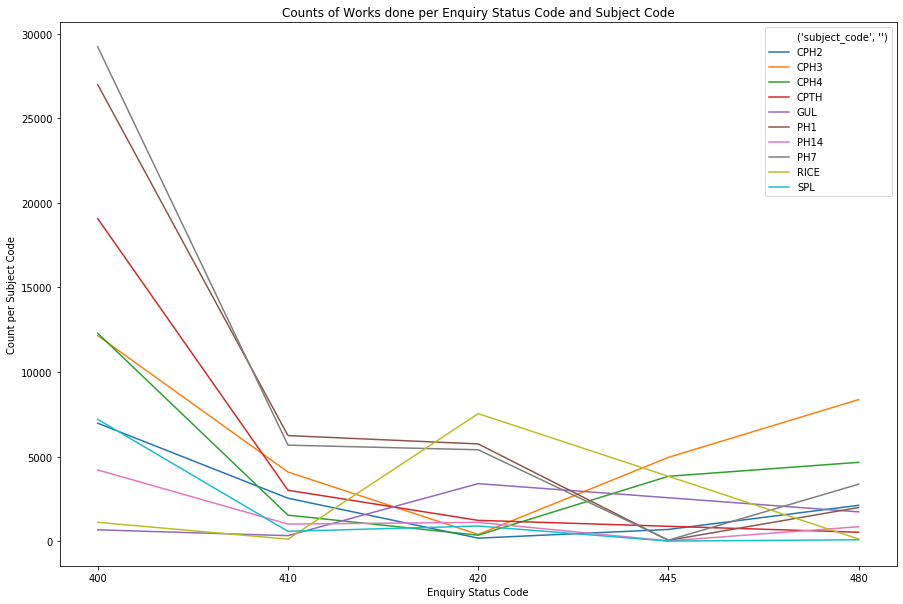

In [22]:
##Plot the subject codes vs enquiry status (Line plot) 
#Keep only the top 5 instances of enquiry status
#Keep only the top 10 instances of subject code
filter_prioc = ['400','410','420','480','445']
filter_subc = ['PH7','PH1','CPTH','CPH3','CPH4','CPH2','SPL','PH14','GUL','RICE']

perenq = year_df[year_df.enq_status_code.isin(filter_prioc)]
perenq = perenq[perenq.subject_code.isin(filter_subc)]
perenq = perenq.reset_index(drop=True)

perenq = perenq[['enq_status_code','subject_code']]
perenq['enq_status_code'] = perenq['enq_status_code'].astype(str)

perenq3 = perenq.groupby(['enq_status_code','subject_code']).agg({'subject_code': ['count']})
perenq3.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=(  'enq_status_code',      ''), y= ('subject_code', 'count'), 
                  data=perenq3, hue=('subject_code', ''), legend="full")
ax.set_title('Counts of Works done per Enquiry Status Code and Subject Code')

plt.legend(loc='upper right')
ax.set_xlabel('Enquiry Status Code')
ax.set_ylabel('Count per Subject Code')

In [23]:
perenq3.columns

MultiIndex([('enq_status_code',      ''),
            (   'subject_code',      ''),
            (   'subject_code', 'count')],
           )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED419C8>,
      dtype=object)

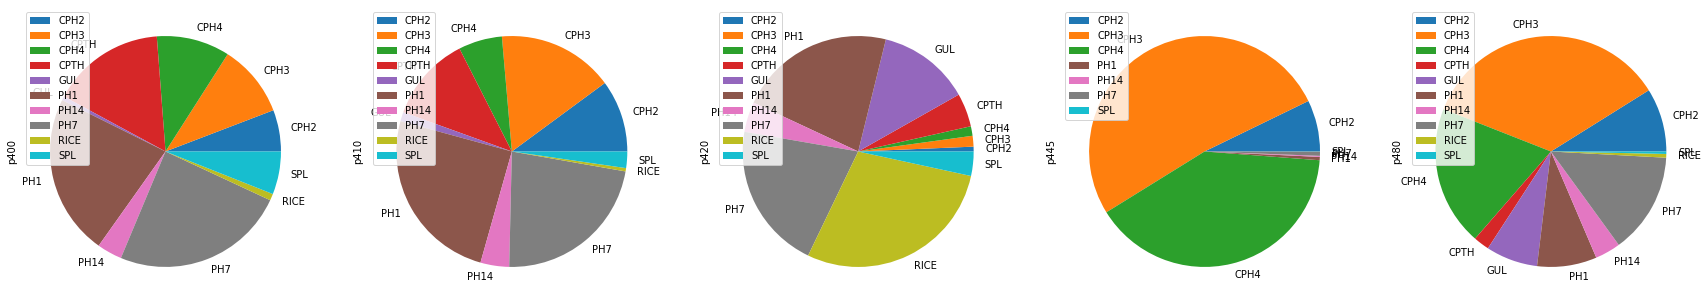

In [24]:
##Plot the subject codes vs enquiry status (Line plot) 
#Keep only the top 5 instances of enquiry status
#Keep only the top 10 instances of subject code

perenq3 = perenq.groupby(['enq_status_code','subject_code']).agg({'subject_code': ['count']}).unstack(level = 0)
perenq3.reset_index(inplace = True)
perenq3.columns = perenq3.columns.droplevel()

perenq3.rename(inplace = True, columns = {'':'index', '':'Enq Code', '400':'p400', 
                                 '410':'p410', '420':'p420', '445':'p445', '480':'p480'})
perenq3.columns = perenq3.columns.droplevel()
perenq3.set_index('Enq Code', inplace = True)
perenq3.plot.pie(subplots=True, figsize=(30, 30))



### Officer code counts

In [25]:
report['officer_code'].value_counts().head(10)

LWRW    42851
CSC3    29575
WEB     24211
LW2     13613
LW3     11210
LW6     10788
LW5      8395
NRSW     7525
LW8      5601
LW0      5592
Name: officer_code, dtype: int64

In [26]:
ans = report.groupby(['officer_code'],as_index = False).size().sort_values(ascending = False).head(25).sum()
print('The instances covered by the top 25 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 25 codes are: 211750
Which represents: 82.0% of the total amount


### Distribution per area name

In [27]:
report.columns

Index(['enquiry_number', 'enquiry_time', 'service_code', 'subject_code',
       'priority_code', 'enq_status_code', 'log_effective_date',
       'enquiry_desc', 'officer_code', 'claim_date', 'claim_tot', 'claim_code',
       'area_name', 'site_address', 'quad', 'feature_location', 'asset_id',
       'Year'],
      dtype='object')

In [28]:
report['area_name'].value_counts().head(15)

Hemel Hempstead           19782
St Albans City            13925
Broxbourne                13300
Stevenage                 12119
Watford Borough           11412
Harpenden                  9429
Welwyn Garden City         7362
Hatfield                   7066
Bishop's Stortford         6984
Rickmansworth              6659
Letchworth Garden City     6195
Berkhamsted                6069
Bushey                     5980
Hitchin                    5674
Hertford                   5441
Name: area_name, dtype: int64

In [29]:
100*report['area_name'].value_counts(normalize=True).head(15)

Hemel Hempstead           7.698295
St Albans City            5.419005
Broxbourne                5.175782
Stevenage                 4.716188
Watford Borough           4.441054
Harpenden                 3.669357
Welwyn Garden City        2.864970
Hatfield                  2.749780
Bishop's Stortford        2.717869
Rickmansworth             2.591393
Letchworth Garden City    2.410825
Berkhamsted               2.361791
Bushey                    2.327156
Hitchin                   2.208074
Hertford                  2.117401
Name: area_name, dtype: float64

In [30]:
ans = report.groupby(['area_name'],as_index = False).size().sort_values(ascending = False).head(35).sum()
print('The instances covered by the top 37 codes are: ' + str(ans))
print('Which represents: '+str(round((ans*100)/report.shape[0]),) + '% of the total amount')

The instances covered by the top 37 codes are: 201524
Which represents: 78.0% of the total amount


No handles with labels found to put in legend.


Text(0, 0.5, 'Count')

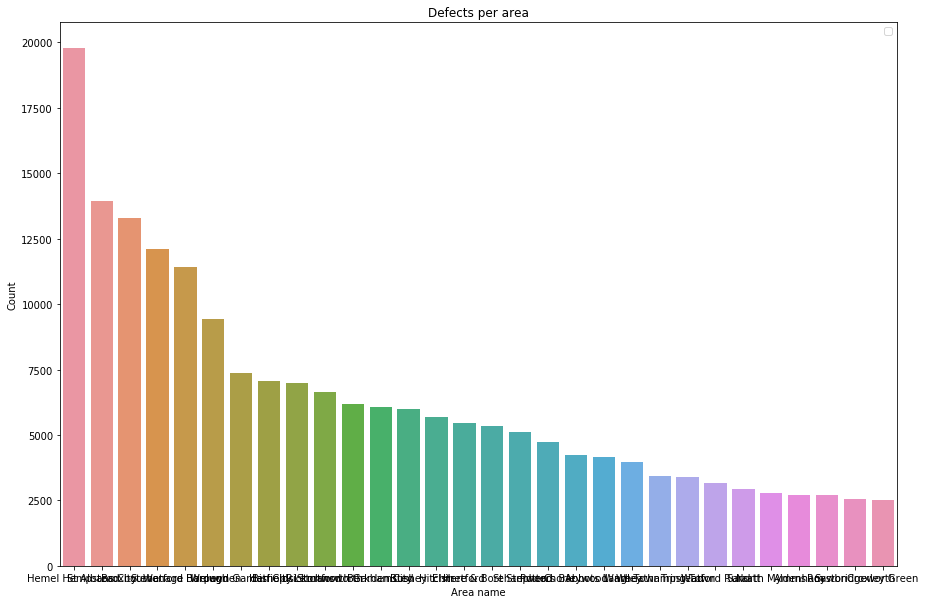

In [31]:
#Plot the number of works per area_name

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="area_name", data=report,  order = report['area_name'].value_counts().head(30).index)
ax.set_title('Defects per area')

plt.legend(loc='upper right')

ax.set_xlabel('Area name')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count per District')

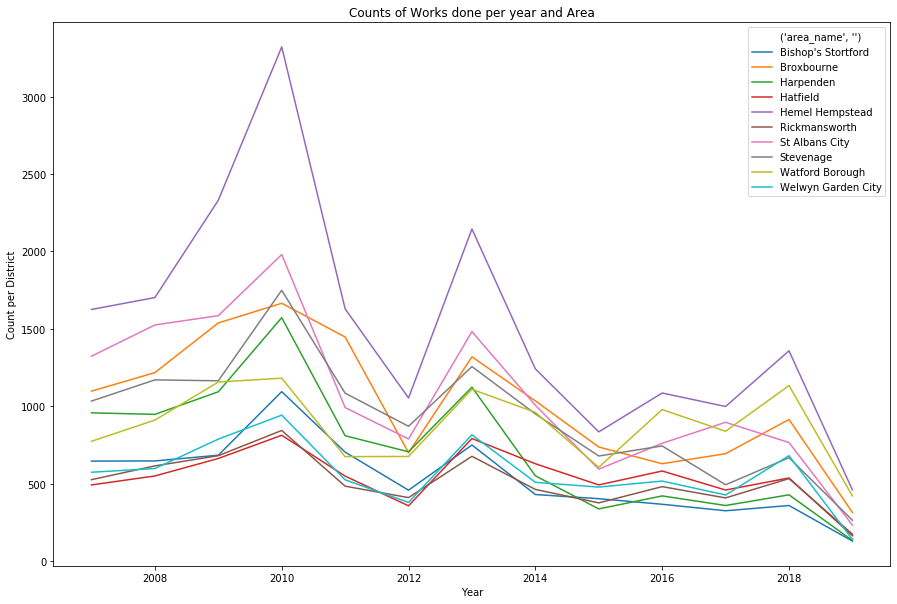

In [32]:
##Plot the evolution of works per area divided by year (Line plot) *Removing the null years
#Keep only the top 10 instances
filter_area = ['Hemel Hempstead','St Albans City','Broxbourne','Stevenage','Watford Borough',
               'Harpenden','Welwyn Garden City','Hatfield',"Bishop's Stortford",'Rickmansworth']

perarea = year_df[year_df.area_name.isin(filter_area)]
perarea = perarea.reset_index(drop=True)
pearea = perarea[['Year','area_name']]
#persubject['Year'] = persubject['Year'].astype(str)

perarea2 = perarea.groupby(['Year','area_name']).agg({'area_name': ['count']})
perarea2.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=('Year',      ''), y= (  'area_name', 'count'), data=perarea2, hue=(  'area_name',      ''))
ax.set_title('Counts of Works done per year and Area')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Count per District')

In [33]:
report['quad'].value_counts()

EH         65450
Unknown    57205
SW         46969
MW         42675
WEB        24216
NH         20451
Name: quad, dtype: int64

In [34]:
report['asset_id'].value_counts().head(25)

C74/140      288
B652/10      268
C94/20       222
A4251/220    210
6U1007/10    204
C87/110      192
7U66/10      191
2U801/10     186
B556/10      175
C74/110      168
1U572/10     165
C72/50       158
C75/130      157
C76/120      153
C143/10      152
8U41/20      149
C137/10      148
C80/210      148
A4147/110    146
C115/10      146
C115/20      146
7U41/10      145
6U993/10     145
2U1108/10    143
C143/130     140
Name: asset_id, dtype: int64

In [35]:
#report.loc[report['UnitIDs'] =='A1081']
#report[report.UnitIDs.isin(['6U57'])]
exp = report[report['asset_id'].str.contains("C74/140", na=False)]
#exp['***Year***'].value_counts()

## **Some of the rows are duplicates, where the only variable that changes is the LatestWorkCost

In [36]:
exp.shape

(289, 18)

In [37]:
exp

,enquiry_number,enquiry_time,service_code,subject_code,priority_code,enq_status_code,log_effective_date,enquiry_desc,officer_code,claim_date,claim_tot,claim_code,area_name,site_address,quad,feature_location,asset_id,Year
89968,76796,11/11/2008 14:45,CW,PH1,H24,400,12/11/2008 11:30,"Potholes along this road, especially at the ju...",CBL1,NaN,NaN,NaN,Sarratt,Sarratt Road,EH,Little Green Lane To Solesbridge Lane,C74/140,2008
89969,1427191,04/03/2009 14:29,CW,PH1,H24,430,05/03/2009 11:00,before the corner with the entrance to micklef...,WEB,NaN,NaN,NaN,Sarratt,Sarratt Road,WEB,Little Green Lane To Solesbridge Lane,C74/140,2009
89970,1446864,07/07/2009 12:10,CW,PH7,D7,410,08/07/2009 15:00,There are a lot of big potholes on Sarrat Road...,WEB,NaN,NaN,NaN,Sarratt,Sarratt Road,WEB,Little Green Lane To Solesbridge Lane,C74/140,2009
89971,78661,06/01/2009 09:56,CW,PH1,H24,400,07/01/2009 08:45,NaN,KMA1,NaN,NaN,NaN,Sarratt,Sarratt Road,EH,Little Green Lane To Solesbridge Lane,C74/140,2009
89972,78665,06/01/2009 10:09,CW,PH1,H24,400,07/01/2009 09:00,2 potholes at edge of road by school sign (yor...,CBL1,NaN,NaN,NaN,Sarratt,Sarratt Road,EH,Little Green Lane To Solesbridge Lane,C74/140,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256465,2327417,22/01/2019 09:02:30,FL1,DCF2,H24,410,22/01/2019 11:53:00,road has flooded due to rain- covers all of No...,LWRW,NaN,NaN,NaN,Sarratt,Sarratt Road,Unknown,Little Green Lane To Solesbridge Lane,C74/140,2019
256466,2328534,27/01/2019 09:54:17,FL1,DCF2,H24,410,28/01/2019 09:56:00,This road is blocked its blocked more recently...,LWRW,NaN,NaN,NaN,Sarratt,Sarratt Road,Unknown,Little Green Lane To Solesbridge Lane,C74/140,2019
256467,2339262,14/03/2019 09:02:03,FL1,DCF2,H24,410,15/03/2019 07:34:00,"This has been flooded for 2 days, its not acce...",LWRW,NaN,NaN,NaN,Sarratt,Sarratt Road,Unknown,Little Green Lane To Solesbridge Lane,C74/140,2019
256468,2328383,25/01/2019 21:00:25,CW1,CPH2,H24,410,26/01/2019 13:42:00,on left hand side of road on way to croxley on...,LWRW,NaN,NaN,NaN,Sarratt,Sarratt Road,Unknown,Little Green Lane To Solesbridge Lane,C74/140,2019
